In [84]:
import pandas as pd
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [85]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [86]:
df.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [87]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

array([[<Axes: title={'center': 'writing score'}>]], dtype=object)

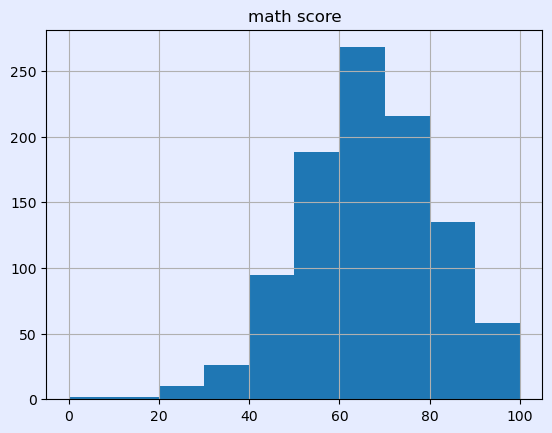

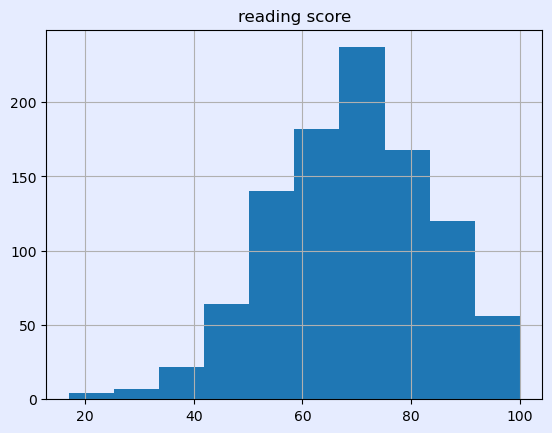

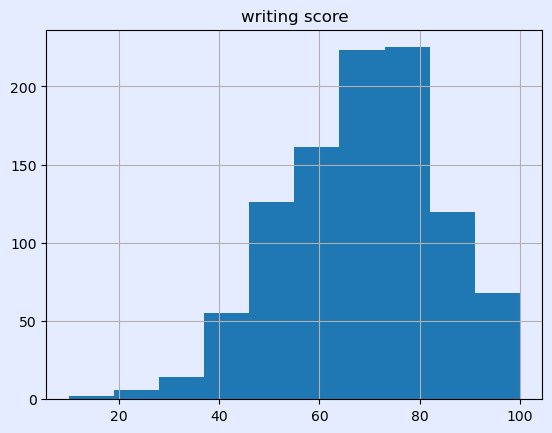

In [88]:
df.hist(column='math score',bins=10)
df.hist(column='reading score',bins=10)
df.hist(column='writing score',bins=10)

In [89]:
# df.info()

<Axes: >

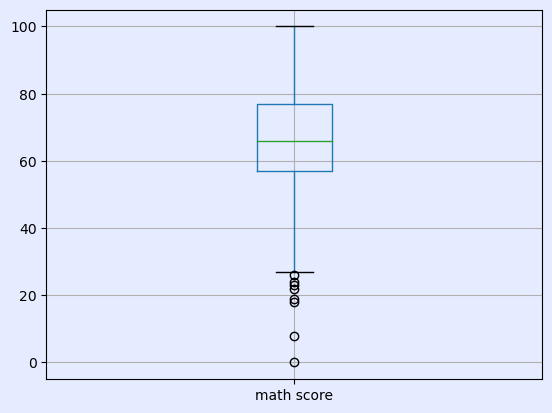

In [90]:
df.boxplot(column='math score')


<Axes: >

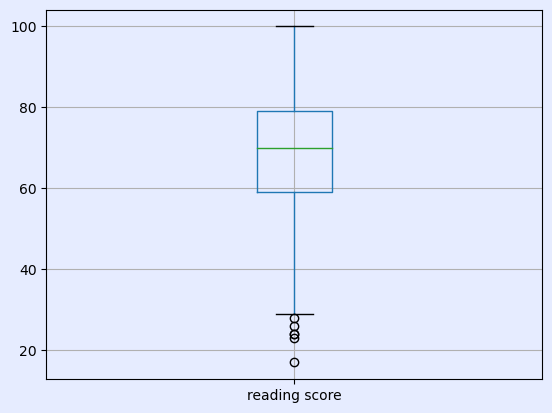

In [91]:
df.boxplot(column='reading score')


<Axes: >

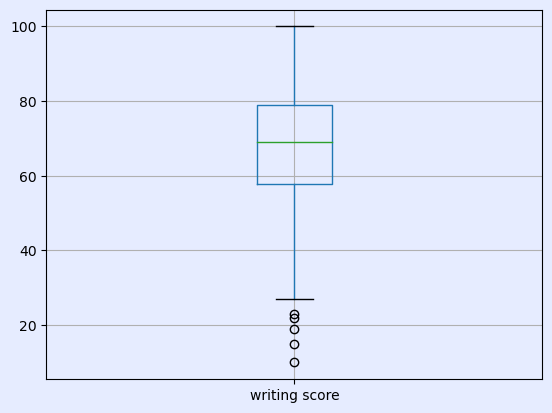

In [92]:
df.boxplot(column='writing score')


In [93]:
grouped_gender = df.groupby('gender')

# Describe the data for male students
male_data = grouped_gender.get_group('male')
male_scores_description = male_data[['math score', 'reading score', 'writing score']].describe()

# Describe the data for female students
female_data = grouped_gender.get_group('female')
female_scores_description = female_data[['math score', 'reading score', 'writing score']].describe()

# Print the descriptions
print("Description of scores for male students:")
print(male_scores_description)

print("\nDescription of scores for female students:")
print(female_scores_description)

Description of scores for male students:
       math score  reading score  writing score
count  482.000000     482.000000     482.000000
mean    68.728216      65.473029      63.311203
std     14.356277      13.931832      14.113832
min     27.000000      23.000000      15.000000
25%     59.000000      56.000000      53.000000
50%     69.000000      66.000000      64.000000
75%     79.000000      75.000000      73.750000
max    100.000000     100.000000     100.000000

Description of scores for female students:
       math score  reading score  writing score
count  518.000000     518.000000     518.000000
mean    63.633205      72.608108      72.467181
std     15.491453      14.378245      14.844842
min      0.000000      17.000000      10.000000
25%     54.000000      63.250000      64.000000
50%     65.000000      73.000000      74.000000
75%     74.000000      83.000000      82.000000
max    100.000000     100.000000     100.000000


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [96]:
import numpy as np

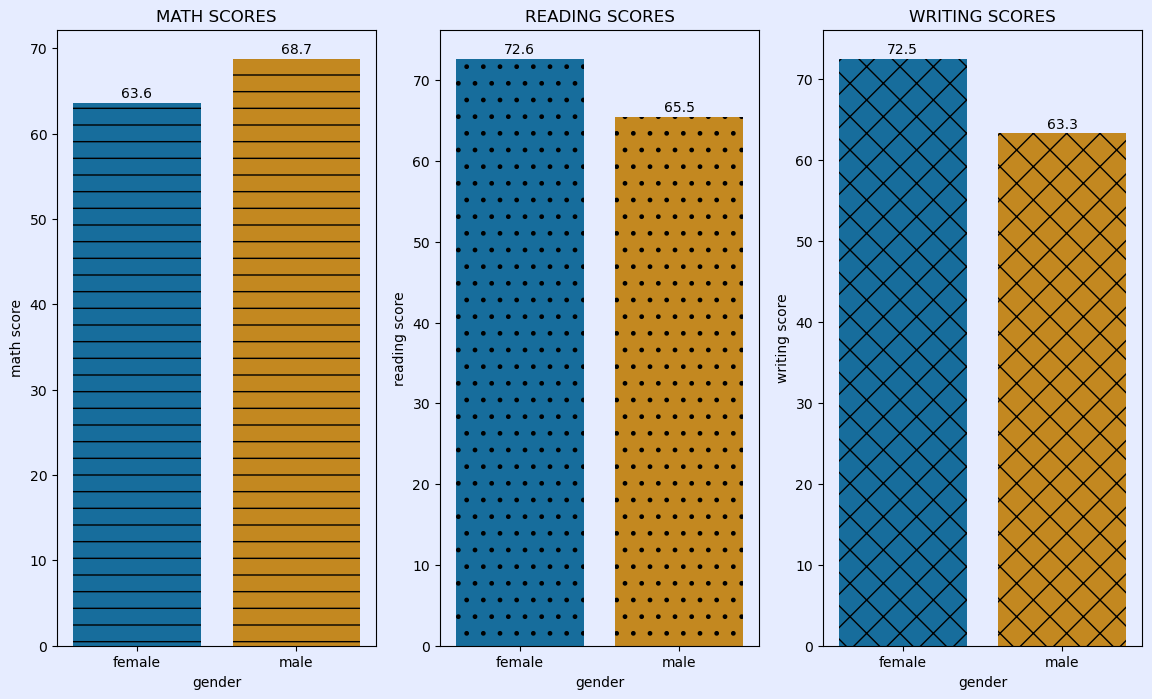

In [97]:
# plt.rcParams['figure.facecolor'] = "#e6ecff"
# plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
bar1 = sns.barplot(x='gender',y='math score',data=df,palette='colorblind',**{'hatch':'-','linewidth':2},errorbar=None)
plt.title('MATH SCORES')
show_values(bar1)
plt.subplot(1, 3, 2)
bar2 = sns.barplot(x='gender',y='reading score',data=df,palette='colorblind',**{'hatch':'.','linewidth':2},errorbar=None)
show_values(bar2)
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
bar3=sns.barplot(x='gender',y='writing score',data=df,palette='colorblind',**{'hatch':'x','linewidth':20},errorbar=None)
show_values(bar3)
plt.title('WRITING SCORES')
plt.show()


- Average score in writing and reading of female is greater than male
- Women score less in average in maths compared to male 